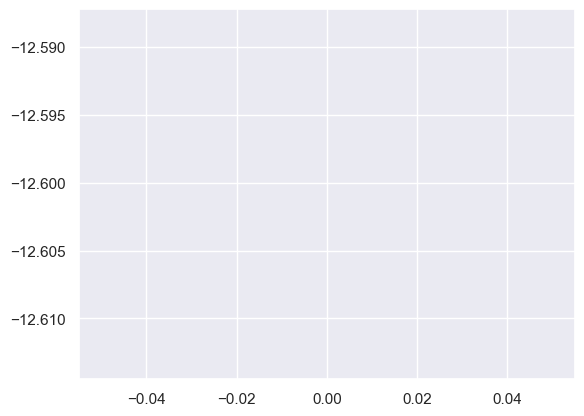

In [1]:
# Import necessary libraries
import os
import gym
from environments.energy_management_env import EnergyManagementEnv

# Import the Agent class from your code


# Import environment registration function
from environments.env_registration import register_env

# Define environment parameters
env_params = {
    'SOC_min': 0.2,
    'SOC_max': 0.8,
    'E': 1000,
    'lambda_val': 0.1,
    'data_path': 'data/Data_input.csv',
    'initial_SOC': 0.5  # Set to None if not using an initial_SOC
}

# Register the custom environment
register_env('EnergyManagement-v0', 'environments.env_registration:environment_creator',{'environment_class': EnergyManagementEnv, **env_params})

from rl_monitoring_utils.vectorized_env_wrapper import VectorizedEnvWrapper
from policies.categorical_policy import CategoricalPolicy
from learning_utils.value_estimator import ValueEstimator
from agents.a2c import A2C
from agents.a2c_warm_start import A2C_WarmStart
from agents.ppo import PPO
from agents.reinforce import REINFORCE
import gym


energy_management = VectorizedEnvWrapper(gym.make("EnergyManagement-v0"), num_envs=8)

categorical = CategoricalPolicy(energy_management, lr=1e-2, hidden_sizes=[])
value_estimator = ValueEstimator(energy_management, lr=1e-2)
a2c_agent_0, totals_a2c_0 = A2C(energy_management, categorical, value_estimator, epochs=1, gamma = 1, T = 720)

categorical = CategoricalPolicy(energy_management, lr=1e-2, hidden_sizes=[16])
value_estimator = ValueEstimator(energy_management, lr=1e-2)
a2c_agent_16, totals_a2c_16 = A2C(energy_management, categorical, value_estimator, epochs=1, gamma = 1, T = 720)

categorical = CategoricalPolicy(energy_management, lr=1e-2, hidden_sizes=[32])
value_estimator = ValueEstimator(energy_management, lr=1e-2)
a2c_agent_32, totals_a2c_32 = A2C(energy_management, categorical, value_estimator, epochs=1, gamma = 1, T = 720)

categorical = CategoricalPolicy(energy_management, lr=1e-2, hidden_sizes=[64,32])
value_estimator = ValueEstimator(energy_management, lr=1e-2)
a2c_agent_64_32, totals_a2c_64_32 = A2C(energy_management, categorical, value_estimator, epochs=1, gamma = 1, T = 720)


categorical = CategoricalPolicy(energy_management, lr=1e-2, hidden_sizes=[])
value_estimator = ValueEstimator(energy_management, lr=1e-2)
ppo_agent_0, totals_ppo_0 = PPO(energy_management, categorical, value_estimator, epochs=1, gamma = 1, T = 720)

categorical = CategoricalPolicy(energy_management, lr=1e-2, hidden_sizes=[16])
value_estimator = ValueEstimator(energy_management, lr=1e-2)
ppo_agent_16, totals_ppo_16 = PPO(energy_management, categorical, value_estimator, epochs=1, gamma = 1, T = 720)

categorical = CategoricalPolicy(energy_management, lr=1e-2, hidden_sizes=[32])
value_estimator = ValueEstimator(energy_management, lr=1e-2)
ppo_agent_32, totals_ppo_32 = PPO(energy_management, categorical, value_estimator, epochs=1, gamma = 1, T = 720)

categorical = CategoricalPolicy(energy_management, lr=1e-2, hidden_sizes=[64,32])
value_estimator = ValueEstimator(energy_management, lr=1e-2)
ppo_agent_64_32, totals_ppo_64_32 = PPO(energy_management, categorical, value_estimator, epochs=1, gamma = 1, T = 720)

Running A2C_0
Running A2C_16218518403438658
Running A2C_32246525103988656
Running A2C_64_32466503698655
Running PPO_0.226341603588658
Running PPO_16217779903408656
Running PPO_32231288703048657
Running PPO_64_32209203938658


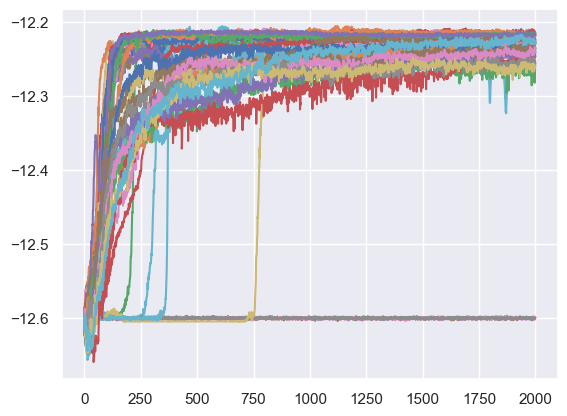

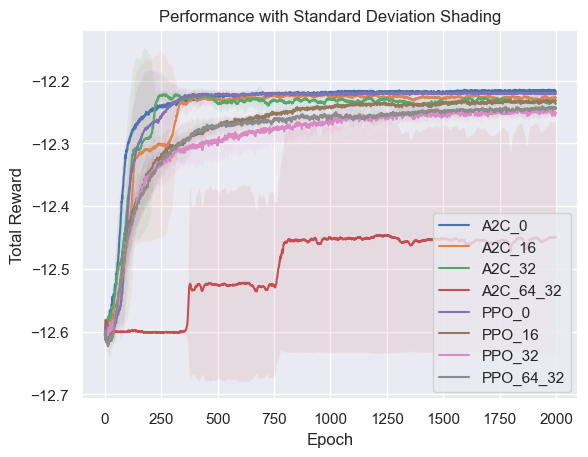

In [1]:
# Import necessary libraries
import os
import gym
from environments.energy_management_env import EnergyManagementEnv

# Import the Agent class from your code


# Import environment registration function
from environments.env_registration import register_env

# Define environment parameters
env_params = {
    'SOC_min': 0.2,
    'SOC_max': 0.8,
    'E': 1000,
    'lambda_val': 0.1,
    'data_path': 'data/Data_input.csv',
    'initial_SOC': 0.5  # Set to None if not using an initial_SOC
}

# Register the custom environment
register_env('EnergyManagement-v0', 'environments.env_registration:environment_creator',{'environment_class': EnergyManagementEnv, **env_params})

from rl_monitoring_utils.vectorized_env_wrapper import VectorizedEnvWrapper
from policies.categorical_policy import CategoricalPolicy
from learning_utils.value_estimator import ValueEstimator
from agents.a2c import A2C
from agents.a2c_warm_start import A2C_WarmStart
from agents.ppo import PPO
from agents.reinforce import REINFORCE
import gym

import numpy as np
import matplotlib.pyplot as plt

# Define a function to run experiments multiple times and collect results
def run_experiment(env, policy_class, agent_class, hidden_sizes, epochs, gamma, T, num_runs):
    totals = []
    for _ in range(num_runs):
        policy = policy_class(env, lr=1e-2, hidden_sizes=hidden_sizes)
        value_estimator = ValueEstimator(env, lr=1e-2)
        agent, total_rewards = agent_class(env, policy, value_estimator, epochs=epochs, gamma=gamma, T=T)
        totals.append(total_rewards)
    return totals

# Configuration for experiments
configurations = [
    ([], A2C, 'A2C_0'),
    ([16], A2C, 'A2C_16'),
    ([32], A2C, 'A2C_32'),
    ([64, 32], A2C, 'A2C_64_32'),
    ([], PPO, 'PPO_0'),
    ([16], PPO, 'PPO_16'),
    ([32], PPO, 'PPO_32'),
    ([64, 32], PPO, 'PPO_64_32')
]

energy_management = VectorizedEnvWrapper(gym.make("EnergyManagement-v0"), num_envs=8)

num_runs = 5
epochs = 2000
gamma = 1
T = 720

results = {}
# Run experiments for all configurations
for hidden_sizes, agent_class, label in configurations:
    print(f"Running {label}")
    results[label] = run_experiment(energy_management, CategoricalPolicy, agent_class, hidden_sizes, epochs, gamma, T, num_runs)

# Plot results
fig, ax = plt.subplots()
for label, data in results.items():
    means = np.mean(data, axis=0)
    stddev = np.std(data, axis=0)
    epochs_range = range(len(means))
    ax.plot(epochs_range, means, label=label)
    ax.fill_between(epochs_range, means - stddev, means + stddev, alpha=0.1)
ax.set_title('Performance with Standard Deviation Shading')
ax.set_xlabel('Epoch')
ax.set_ylabel('Total Reward')
ax.legend()
plt.show()


Running A2C_64
Running PPO_64225203803498657


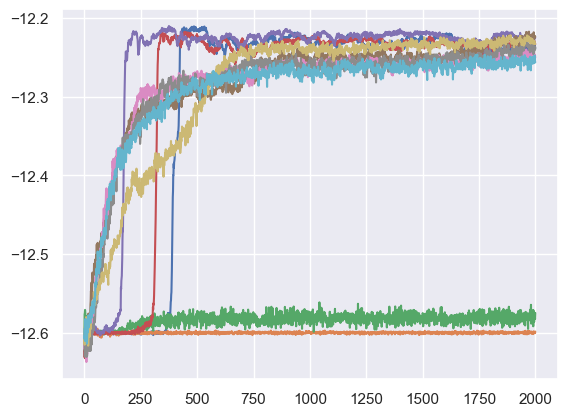

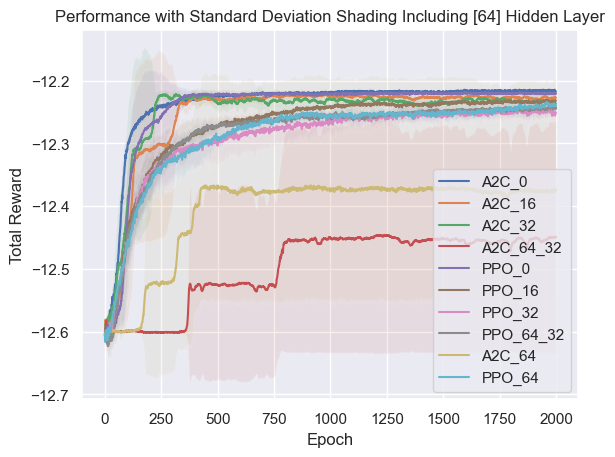

In [2]:
# Add the new configuration for both A2C and PPO with hidden size [64]
configurations.extend([
    ([64], A2C, 'A2C_64'),
    ([64], PPO, 'PPO_64')
])

# Re-run experiments for the new configurations only
for hidden_sizes, agent_class, label in configurations[-2:]:  # Only the last two new configurations
    print(f"Running {label}")
    results[label] = run_experiment(energy_management, CategoricalPolicy, agent_class, hidden_sizes, epochs, gamma, T, num_runs)

# Replot results including the new configuration
fig, ax = plt.subplots()
for label, data in results.items():
    means = np.mean(data, axis=0)
    stddev = np.std(data, axis=0)
    epochs_range = range(len(means))
    ax.plot(epochs_range, means, label=label)
    ax.fill_between(epochs_range, means - stddev, means + stddev, alpha=0.1)
ax.set_title('Performance with Standard Deviation Shading Including [64] Hidden Layer')
ax.set_xlabel('Epoch')
ax.set_ylabel('Total Reward')
ax.legend()
plt.show()
